# Landcover Data Preprocessing

In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent.parent))

from config import raw_files, processed_files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas

In [3]:
from shapely import wkt

filepath = processed_files["landcover"]
df = pd.read_csv(filepath)

# Convert 'geometry' column from WKT string to shapely geometry
df['geometry'] = df['geometry'].apply(wkt.loads)

gdf = geopandas.GeoDataFrame(df, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)  

,ID,GRIDCODE,AREA,LCCCODE,geometry
0,4,210,6.228187e+06,7001 // 8001,"POLYGON ((6.41528 37.08696, 6.43103 37.0855, 6..."
1,2,210,6.242408e+06,7001 // 8001,"POLYGON ((7.18084 37.07917, 7.17998 37.08091, ..."
2,1,210,1.482995e+06,7001 // 8001,"POLYGON ((7.37137 37.08194, 7.3709 37.08717, 7..."
3,8,50,4.590841e+08,21497-121340,"POLYGON ((6.12361 36.68472, 6.12361 36.69306, ..."
4,13,210,6.371533e+06,7001 // 8001,"POLYGON ((6.26181 37.02361, 6.26193 37.02514, ..."
...,...,...,...,...,...
438508,52055,201,1.646170e+05,6001,"POLYGON ((9.62361 30.27083, 9.62361 30.26806, ..."
438509,52058,200,1.482200e+05,0011,"POLYGON ((9.56891 30.2625, 9.57361 30.2625, 9...."
438510,52057,201,2.797149e+06,6001,"POLYGON ((9.57053 30.25694, 9.57083 30.25694, ..."
438511,52056,201,6.585450e+05,6001,"POLYGON ((9.62083 30.25972, 9.62083 30.25694, ..."


In [7]:
gdf['centroid'] = gdf['geometry'].centroid

gdf["longitude"] = gdf.centroid.map(lambda p: p.x)
gdf["latitude"] = gdf.centroid.map(lambda p: p.y)

/tmp/ipykernel_29366/2051108772.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf['geometry'].centroid
/tmp/ipykernel_29366/2051108772.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["longitude"] = gdf.centroid.map(lambda p: p.x)
/tmp/ipykernel_29366/2051108772.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["latitude"] = gdf.centroid.map(lambda p: p.y)


In [11]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 438513 entries, 0 to 438512
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   ID         438513 non-null  int64   
 1   GRIDCODE   438513 non-null  int64   
 2   AREA       438513 non-null  float64 
 3   LCCCODE    438513 non-null  object  
 4   geometry   438513 non-null  geometry
 5   centroid   438513 non-null  geometry
 6   longitude  438513 non-null  float64 
 7   latitude   438513 non-null  float64 
dtypes: float64(3), geometry(2), int64(2), object(1)
memory usage: 26.8+ MB


<Axes: ylabel='LCCCODE'>

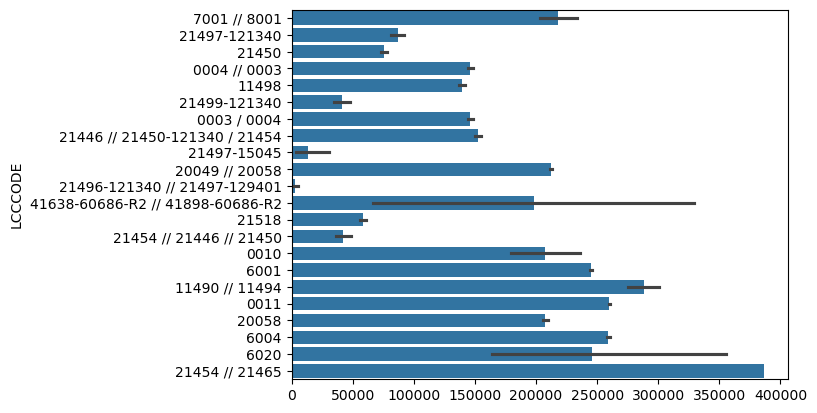

In [12]:
sns.barplot(gdf['LCCCODE'])

In [16]:
dummies = gdf['LCCCODE'].astype('category').cat.codes  
gdf['LCCCODE'] = dummies

In [18]:
dummies = pd.get_dummies(gdf['LCCCODE'], prefix='LCCCODE')

gdf_encoded = pd.concat([gdf, dummies], axis=1)

In [19]:
gdf_encoded

,ID,GRIDCODE,AREA,LCCCODE,geometry,centroid,longitude,latitude,LCCCODE_0,LCCCODE_1,...,LCCCODE_12,LCCCODE_13,LCCCODE_14,LCCCODE_15,LCCCODE_16,LCCCODE_17,LCCCODE_18,LCCCODE_19,LCCCODE_20,LCCCODE_21
0,4,210,6.228187e+06,21,"POLYGON ((6.41528 37.08696, 6.43103 37.0855, 6...",POINT (6.48424 37.07607),6.484240,37.076069,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,210,6.242408e+06,21,"POLYGON ((7.18084 37.07917, 7.17998 37.08091, ...",POINT (7.23473 37.07833),7.234732,37.078333,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1,210,1.482995e+06,21,"POLYGON ((7.37137 37.08194, 7.3709 37.08717, 7...",POINT (7.38373 37.08469),7.383729,37.084692,False,False,...,False,False,False,False,False,False,False,False,False,True
3,8,50,4.590841e+08,13,"POLYGON ((6.12361 36.68472, 6.12361 36.69306, ...",POINT (6.33967 36.90781),6.339666,36.907812,False,False,...,False,True,False,False,False,False,False,False,False,False
4,13,210,6.371533e+06,21,"POLYGON ((6.26181 37.02361, 6.26193 37.02514, ...",POINT (6.33556 37.05909),6.335560,37.059089,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438508,52055,201,1.646170e+05,18,"POLYGON ((9.62361 30.27083, 9.62361 30.26806, ...",POINT (9.62083 30.26944),9.620833,30.269444,False,False,...,False,False,False,False,False,False,True,False,False,False
438509,52058,200,1.482200e+05,3,"POLYGON ((9.56891 30.2625, 9.57361 30.2625, 9....",POINT (9.57131 30.26079),9.571314,30.260793,False,False,...,False,False,False,False,False,False,False,False,False,False
438510,52057,201,2.797149e+06,18,"POLYGON ((9.57053 30.25694, 9.57083 30.25694, ...",POINT (9.58127 30.25024),9.581270,30.250245,False,False,...,False,False,False,False,False,False,True,False,False,False
438511,52056,201,6.585450e+05,18,"POLYGON ((9.62083 30.25972, 9.62083 30.25694, ...",POINT (9.61597 30.25764),9.615972,30.257639,False,False,...,False,False,False,False,False,False,True,False,False,False
